<a href="https://colab.research.google.com/github/Oumayma123-maker/Prodigy_DS_Task-5/blob/main/TASK_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
data=pd.read_csv('Road Accident Data.csv')
data.head()

Accident_Index Accident Date Day_of_Week          Junction_Control  \
0  200901BS70001      1/1/2021    Thursday  Give way or uncontrolled   
1  200901BS70002      1/5/2021      Monday  Give way or uncontrolled   
2  200901BS70003      1/4/2021      Sunday  Give way or uncontrolled   
3  200901BS70004      1/5/2021      Monday       Auto traffic signal   
4  200901BS70005      1/6/2021     Tuesday       Auto traffic signal   

           Junction_Detail Accident_Severity   Latitude  \
0  T or staggered junction           Serious  51.512273   
1               Crossroads           Serious  51.514399   
2  T or staggered junction            Slight  51.486668   
3  T or staggered junction           Serious  51.507804   
4               Crossroads           Serious  51.482076   

        Light_Conditions Local_Authority_(District) Carriageway_Hazards  ...  \
0               Daylight     Kensington and Chelsea                 NaN  ...   
1               Daylight     Kensington and Chelsea                 NaN  ...   
2               Daylight     Kensington and Chelsea                 NaN  ...   
3               Daylight     Kensington and Chelsea                 NaN  ...   
4  Darkness - lights lit     Kensington and Chelsea                 NaN  ...   

   Number_of_Casualties  Number_of_Vehicles         Police_Force  \
0                     1                   2  Metropolitan Police   
1                    11                   2  Metropolitan Police   
2                     1                   2  Metropolitan Police   
3                     1                   2  Metropolitan Police   
4                     1                   2  Metropolitan Police   

  Road_Surface_Conditions           Road_Type Speed_limit   Time  \
0                     Dry      One way street          30  15:11   
1             Wet or damp  Single carriageway          30  10:59   
2                     Dry  Single carriageway          30  14:19   
3            Frost or ice  Single carriageway          30   8:10   
4                     Dry  Single carriageway          30  17:25   

  Urban_or_Rural_Area  Weather_Conditions           Vehicle_Type  
0               Urban  Fine no high winds                    Car  
1               Urban  Fine no high winds  Taxi/Private hire car  
2               Urban  Fine no high winds  Taxi/Private hire car  
3               Urban               Other  Motorcycle over 500cc  
4               Urban  Fine no high winds                    Car  

[5 rows x 21 columns]

In [31]:
data.shape

(307973, 21)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [33]:
data.describe()

Latitude      Longitude  Number_of_Casualties  Number_of_Vehicles  \
count  307973.000000  307973.000000         307973.000000       307973.000000   
mean       52.487005      -1.368884              1.356882            1.829063   
std         1.339011       1.356092              0.815857            0.710477   
min        49.914488      -7.516225              1.000000            1.000000   
25%        51.485248      -2.247937              1.000000            1.000000   
50%        52.225943      -1.349258              1.000000            2.000000   
75%        53.415517      -0.206810              1.000000            2.000000   
max        60.598055       1.759398             48.000000           32.000000   

         Speed_limit  
count  307973.000000  
mean       38.866037  
std        14.032933  
min        10.000000  
25%        30.000000  
50%        30.000000  
75%        50.000000  
max        70.000000

# Checking for null/missing values

In [34]:
data.isnull().sum()

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

In [35]:
data.drop(columns='Carriageway_Hazards', inplace=True)

In [36]:
data['Road_Surface_Conditions'].fillna(data['Road_Surface_Conditions'].mode()[0], inplace=True)

In [37]:
data['Weather_Conditions'].fillna(data['Weather_Conditions'].mode()[0], inplace=True)

In [38]:
data['Road_Type'].fillna(data['Road_Type'].mode()[0], inplace=True)

# Checking for duplicate values




In [39]:
data.duplicated().sum()


1

In [40]:
data.drop_duplicates(inplace=True)

# DATA VISUALIZATION

In [41]:
import plotly.express as px

# Count accidents by severity
severity_count = data['Accident_Severity'].value_counts().reset_index()
severity_count.columns = ['Accident_Severity', 'Count']

# Create pie chart
fig = px.pie(severity_count,
             values='Count',
             names='Accident_Severity',
             title='Accident Severity Distribution',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.show()


In [42]:
import plotly.express as px

# Count accidents by severity
severity_count = data['Accident_Severity'].value_counts().reset_index()
severity_count.columns = ['Accident_Severity', 'Count']
# Create bar chart
fig = px.bar(severity_count,
             x='Accident_Severity',
             y='Count',
             title='Accident Severity Distribution',
             color='Accident_Severity',
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Show chart
fig.show()


In [43]:
import plotly.graph_objects as go

# Group data by junction control and accident severity
stacked_data = data.groupby(['Junction_Control', 'Accident_Severity']).size().unstack(fill_value=0)

# Create stacked bar chart
fig = go.Figure()

for severity in stacked_data.columns:
    fig.add_trace(go.Bar(
        x=stacked_data.index,
        y=stacked_data[severity],
        name=severity
    ))

# Update layout for aesthetics
fig.update_layout(
    title='Accident Severity by Junction Control',
    barmode='stack',
    xaxis_title='Junction Control',
    yaxis_title='Number of Accidents',
    colorway=px.colors.qualitative.Plotly,
)

fig.show()


In [44]:
import plotly.express as px

# Create bubble chart
fig = px.scatter(data,
                 x='Number_of_Vehicles',
                 y='Number_of_Casualties',
                 size='Number_of_Casualties',
                 color='Accident_Severity',
                 hover_name='Accident_Severity',
                 title="Number of Vehicles vs Casualties by Severity",
                 color_discrete_sequence=px.colors.qualitative.Set3)

fig.show()


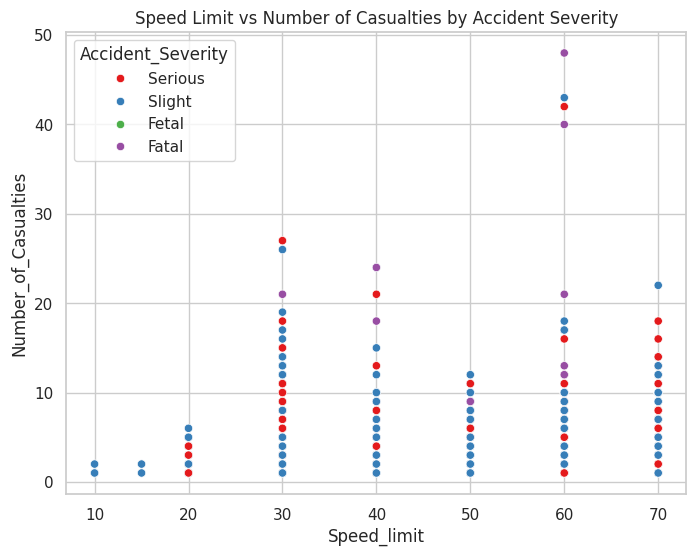

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with Speed_limit vs Number_of_Casualties
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data,
                x='Speed_limit',
                y='Number_of_Casualties',
                hue='Accident_Severity',
                palette='Set1')
plt.title('Speed Limit vs Number of Casualties by Accident Severity')
plt.show()


<ipython-input-46-d2186e2918be>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Speed Limit')

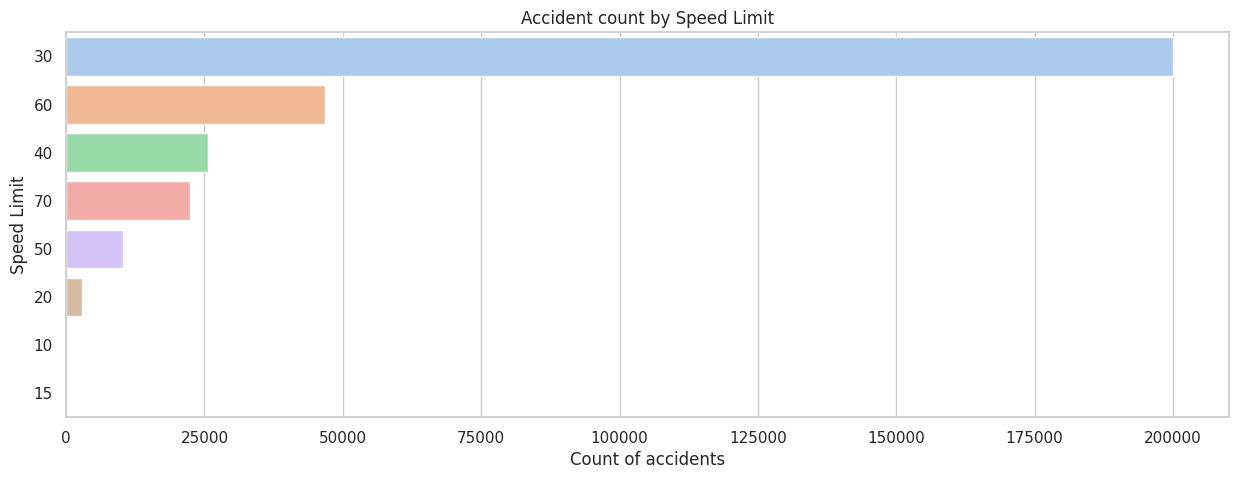

In [46]:
plt.figure(figsize = (15,5))
sns.countplot(data=data, y='Speed_limit', order=data['Speed_limit'].value_counts().index, palette='pastel')
plt.title('Accident count by Speed Limit')
plt.xlabel('Count of accidents')
plt.ylabel('Speed Limit')

In [47]:
import plotly.express as px

# Group by Day_of_Week and count the number of accidents
accidents_per_day = data.groupby('Day_of_Week').size().reset_index(name='Accident Count')
# Create bar chart
fig = px.bar(accidents_per_day,
             x='Day_of_Week',
             y='Accident Count',
             title='Number of Accidents by Day of the Week',
             labels={'Day_of_Week': 'Day of the Week', 'Accident Count': 'Number of Accidents'},
             color='Day_of_Week',
             color_discrete_sequence=px.colors.qualitative.Vivid)
# Show chart
fig.show()



Text(0, 0.5, ' ')

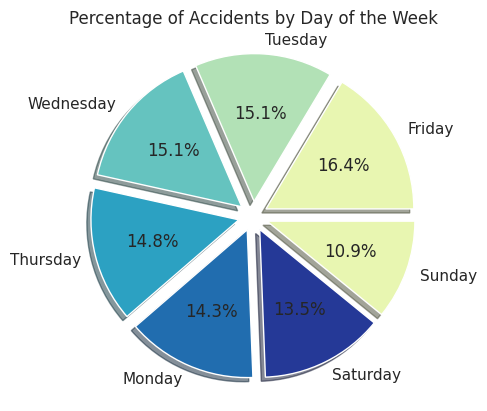

In [48]:
data['Day_of_Week'].value_counts().plot(kind='pie', autopct='%0.1f%%', explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], shadow=True, colors=sns.color_palette("YlGnBu"))
plt.title('Percentage of Accidents by Day of the Week')
plt.ylabel(' ')

In [49]:
import plotly.express as px

# Group by Day_of_Week and sum the Number_of_Casualties
casualties_per_day =data.groupby('Day_of_Week')['Number_of_Casualties'].sum().reset_index()

# Create bar chart
fig = px.bar(casualties_per_day,
             x='Day_of_Week',
             y='Number_of_Casualties',
             title='Number of Casualties by Day of the Week',
             labels={'Day_of_Week': 'Day of the Week', 'Number_of_Casualties': 'Number of Casualties'},
             color='Number_of_Casualties',  # Color bars by the number of casualties
             color_continuous_scale=px.colors.sequential.Plasma)

# Highlight the day with the most casualties
max_casualties_day = casualties_per_day['Day_of_Week'][casualties_per_day['Number_of_Casualties'].idxmax()]
fig.add_annotation(x=max_casualties_day,
                   y=casualties_per_day['Number_of_Casualties'].max(),
                   text='Highest Casualties',
                   showarrow=True,
                   arrowhead=2)

# Show chart
fig.show()


<ipython-input-50-c996e44b9eb6>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




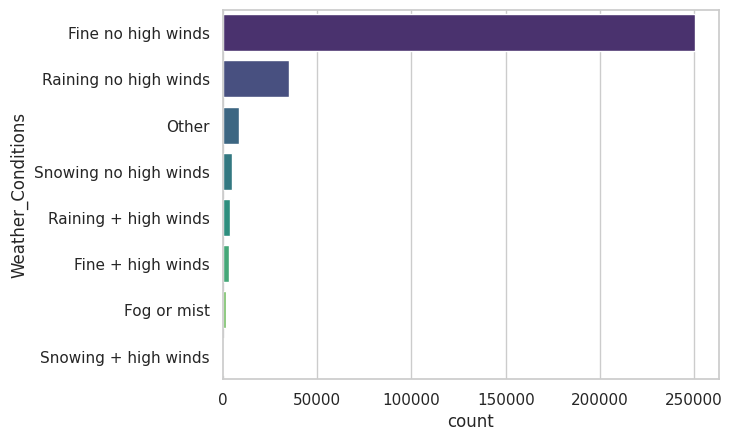

In [50]:
weather = data['Weather_Conditions'].value_counts().sort_values(ascending=False).reset_index()
sns.barplot(x='count',y='Weather_Conditions',data=weather[:10],orient='horizontal',palette='viridis')
plt.show()


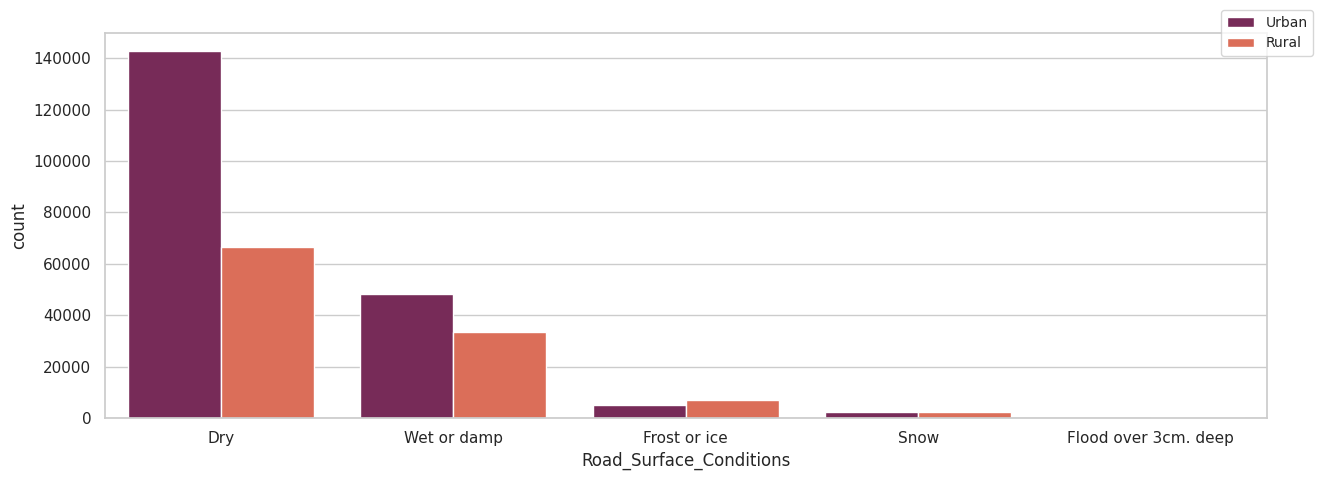

In [51]:
# Create a figure with a specified size (width=15, height=5)
plt.figure(figsize=(15, 5))

# Create a count plot to visualize the distribution of accidents based on road surface conditions
sns.countplot(data=data, x='Road_Surface_Conditions', palette="rocket", hue='Urban_or_Rural_Area')

# Add a legend to the upper left corner outside the plot area
plt.legend(bbox_to_anchor=(1, 1), loc='center', fontsize='small')

In [52]:
import plotly.express as px

# Group by Vehicle_Type and count the number of accidents
accidents_by_vehicle_type = data.groupby('Vehicle_Type').size().reset_index(name='Accident Count')
# Create bar chart
fig = px.bar(accidents_by_vehicle_type,
             x='Vehicle_Type',
             y='Accident Count',
             title='Number of Accidents by Vehicle Type',
             labels={'Vehicle_Type': 'Vehicle Type', 'Accident Count': 'Number of Accidents'},
             color='Vehicle_Type',
             color_discrete_sequence=px.colors.qualitative.Vivid)
# Show chart
fig.show()


In [53]:
import plotly.express as px

# Group by Vehicle_Type and count the number of accidents
accidents_by_vehicle_type = data.groupby('Light_Conditions').size().reset_index(name='Accident Count')
# Create bar chart
fig = px.bar(accidents_by_vehicle_type,
             x='Light_Conditions',
             y='Accident Count',
             title='Accident by Light Condition',
             labels={'Light_Conditions': 'Light_Conditions', 'Accident Count': 'Number of Accidents'},
             color='Light_Conditions',
             color_discrete_sequence=px.colors.qualitative.Vivid)
# Show chart
fig.show()

<ipython-input-54-3ffe0fd24a67>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-54-3ffe0fd24a67>:14: UserWarning:

The palette list has more values (10) than needed (5), which may not be intended.



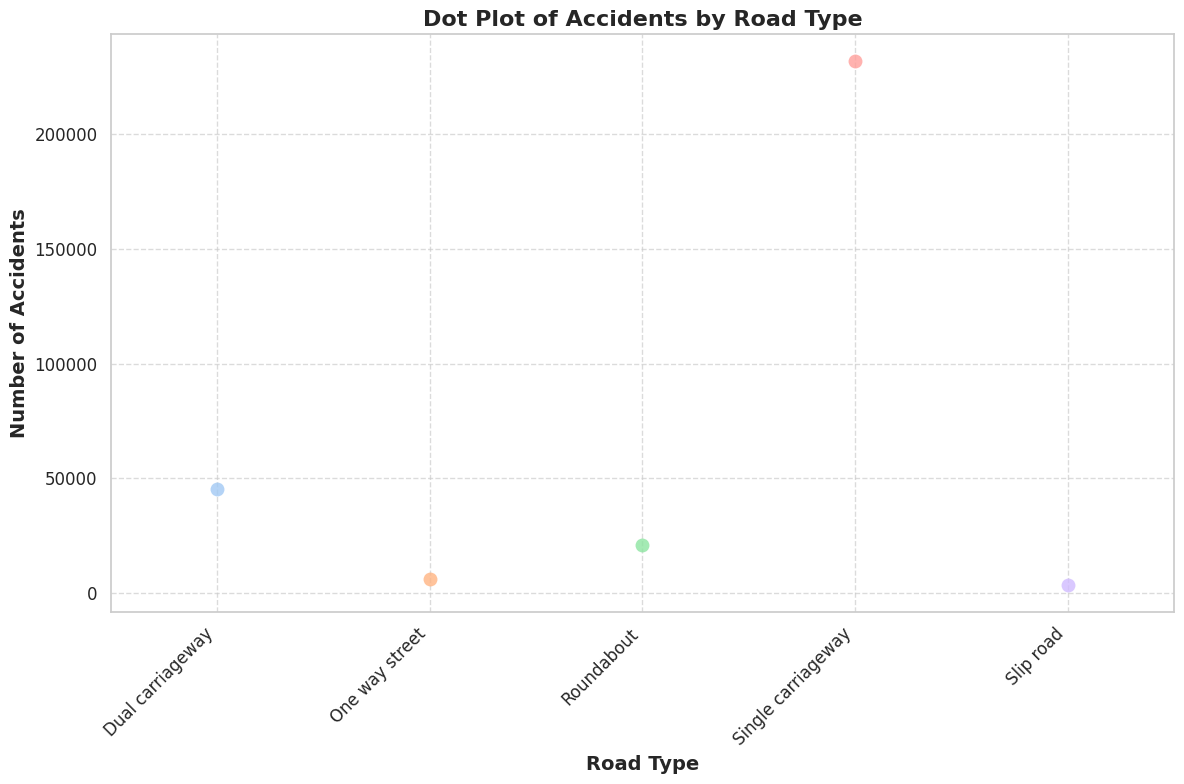

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Aggregate the data
accidents_by_road_type = data.groupby('Road_Type').size().reset_index(name='Accident Count')

# Create a beautiful dot plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")  # A more aesthetically pleasing color palette

sns.stripplot(x='Road_Type', y='Accident Count', data=accidents_by_road_type, jitter=True, palette=palette, size=10, alpha=0.8)

# Adding titles and labels
plt.title('Dot Plot of Accidents by Road Type', fontsize=16, fontweight='bold')
plt.xlabel('Road Type', fontsize=14, fontweight='bold')
plt.ylabel('Number of Accidents', fontsize=14, fontweight='bold')

# Customize tick parameters for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()



Text(0, 0.5, 'Percentage of Accidents')

<Figure size 1500x500 with 0 Axes>

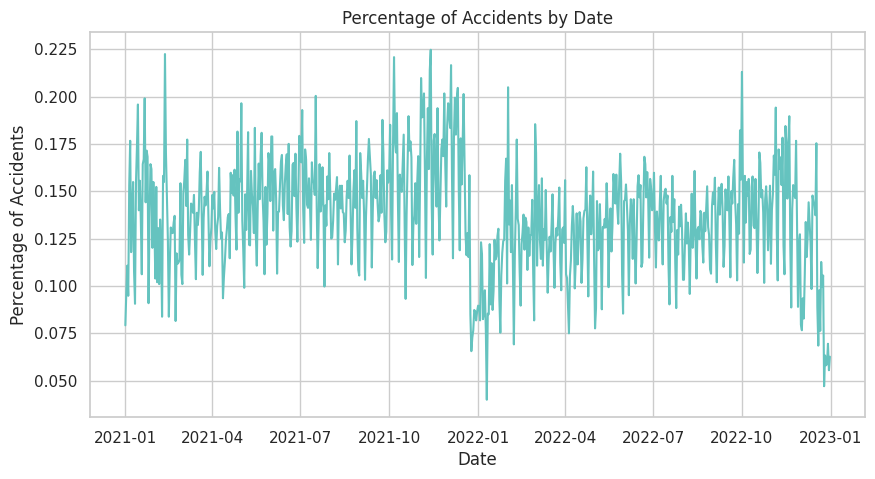

In [55]:
# Create a line chart to calculate the percentage of accidents for each date
plt.figure(figsize=(15,5))
data['Accident Date'] = pd.to_datetime(data['Accident Date'])
date_counts = data['Accident Date'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 5))
sns.lineplot(x=date_counts.index, y=date_counts.values, color=sns.color_palette("YlGnBu")[2])
plt.title('Percentage of Accidents by Date')
plt.xlabel('Date')
plt.ylabel('Percentage of Accidents')

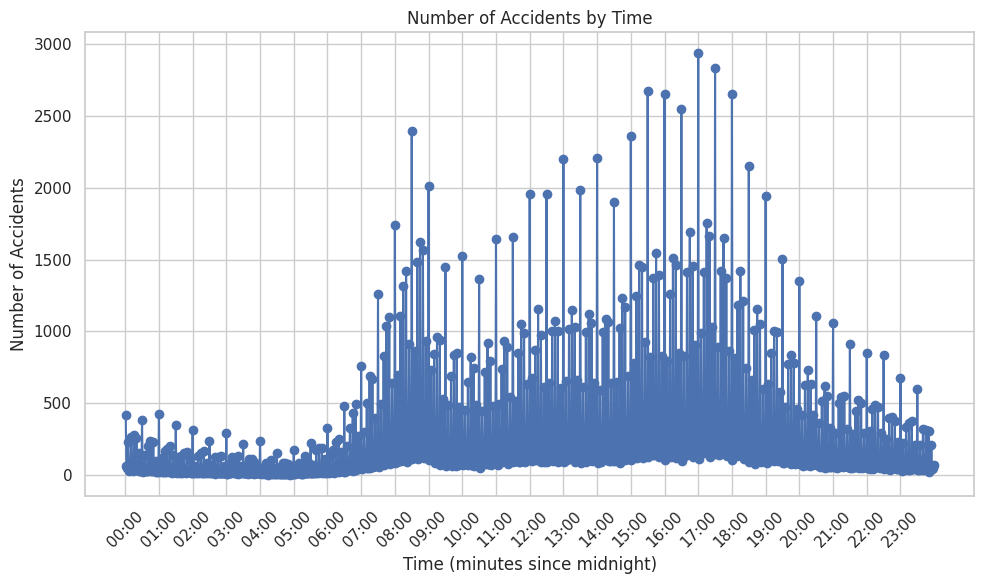

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate the number of accidents by time
accidents_by_time = data.groupby('Time').size().reset_index(name='Accident Count')

# Convert Time to numeric (minutes since midnight)
accidents_by_time['Time'] = pd.to_datetime(accidents_by_time['Time'], format='%H:%M').dt.hour * 60 + pd.to_datetime(accidents_by_time['Time'], format='%H:%M').dt.minute

# Sort by time
accidents_by_time = accidents_by_time.sort_values('Time')

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(accidents_by_time['Time'], accidents_by_time['Accident Count'], marker='o', linestyle='-', color='b')
plt.title('Number of Accidents by Time')
plt.xlabel('Time (minutes since midnight)')
plt.ylabel('Number of Accidents')

# Convert x-axis labels back to time format for readability
plt.xticks(ticks=range(0, 24*60, 60), labels=[f'{h:02}:00' for h in range(0, 24)], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()





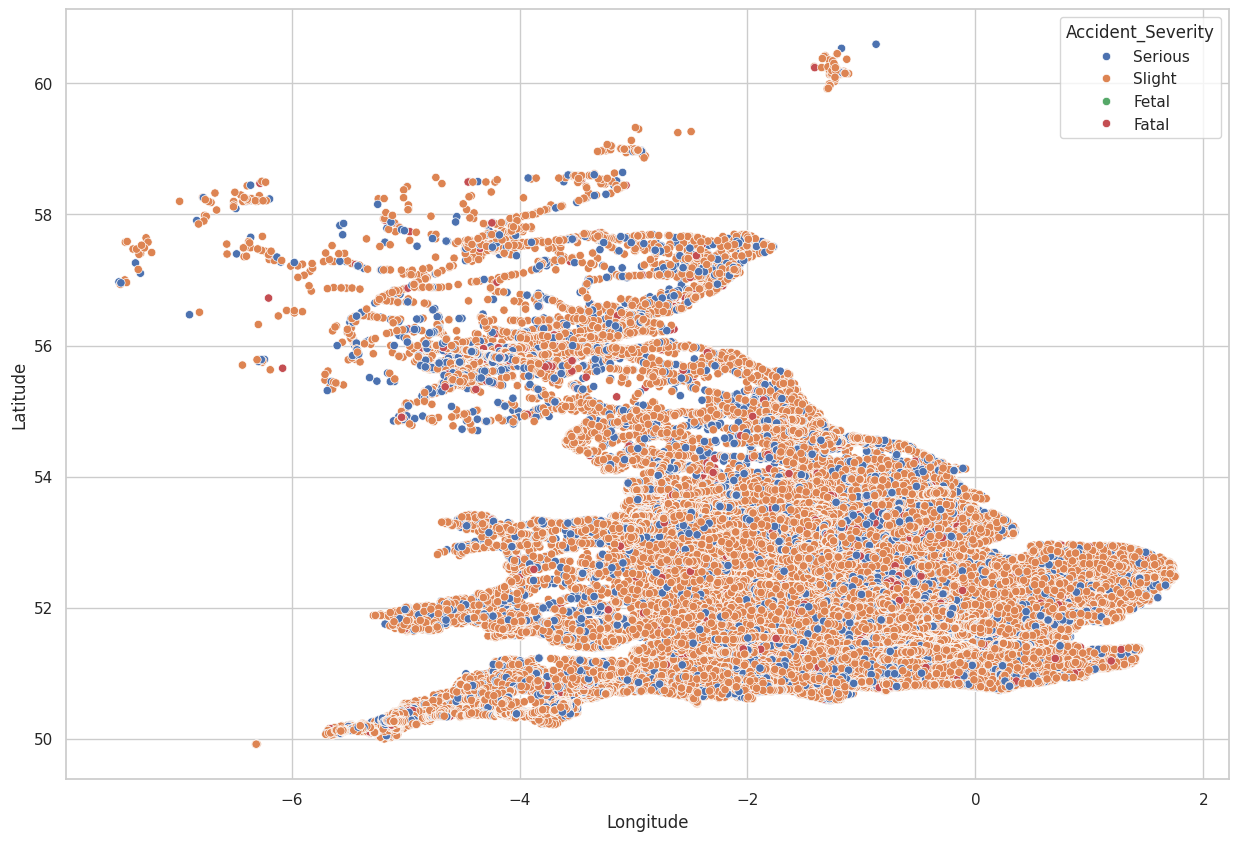

In [57]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=data['Longitude'],y=data['Latitude'],hue=data['Accident_Severity'])
plt.show()

# Conclusion:

Based on the analysis of road accident data, several key insights have been identified:

-Accident Severity: The majority of accidents are classified as slight,
accounting for 85.5% of all cases.

-Accident Severity by Junction Control: Most accidents occur at junctions that are either "give way" or uncontrolled.

-Number of Vehicles vs. Casualties by Severity: Vehicle number 1 has the highest number of casualties (48), with the severity being fatal.

-Speed Limits: A significant number of accidents occur in areas with a 30 mph speed limit.

-Day of the Week: Friday is the day with the highest number of accidents and casualties, representing 16.4% of the total.

-Weather Conditions: Most accidents occur when the weather is fine, with no high winds.

-Road Surface Conditions: The majority of roads involved in accidents are dry, both in urban and rural areas.

-Vehicle Type: Cars are involved in the majority of accidents, with 239.793K recorded incidents.

-Light Conditions: Most accidents happen during daylight hours, with 227.285K accidents recorded.

-Road Type: The majority of accidents occur on single carriageways.

-Time of Day: The peak time for accidents is 17:00.

These insights highlight the importance of addressing factors such as junction control, road conditions, and time of day to improve road safety and reduce accident rates.




